<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Authors: Zhihui Li and Kevin Messali</center>
<br>
<center><i>Approximation of periodic functions</i></center>

# Approximation of periodic functions

&nbsp;

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.linalg import solve as l_solve
import matplotlib.pyplot as plt
import datetime as dt

# 1.2 Suggestions of directions to explore
- You can consider simple 2π-periodic even functions, for instance piece-wise constant or piece-wise linear functions like f and g defined on (−π, π] by

- $ f(x) = \begin{cases} 1 & \mbox{if } x \in [−\frac{\pi}{2}, \frac{\pi}{2}]
\\ -1 & \mbox{otherwise} \end{cases} $

an_f1(0): nan
bn_f1(0): 0
an_f1(1): 0.6366197723675814
bn_f1(1): 0
an_f1(2): 3.8981718325193755e-17
bn_f1(2): 0
an_f1(3): -0.2122065907891938
bn_f1(3): 0
<ipython-input-4-2c5abc593371>:14: RuntimeWarning: invalid value encountered in double_scalars
  return 2*np.sin(n*np.pi/2)/(n*np.pi)


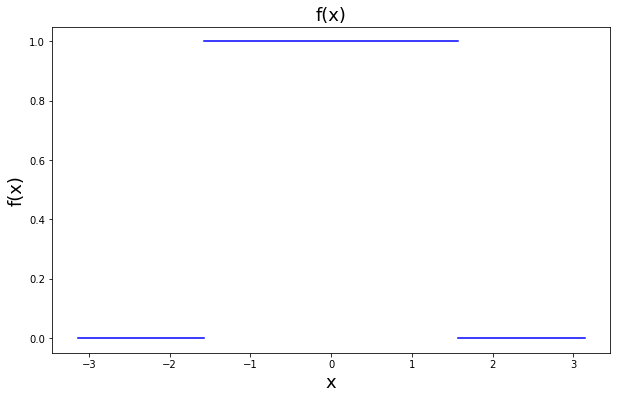

In [4]:
"""
Definition of f: f is a 2-pi periodic even function on (-pi, pi] defined such that f(x) = 1 if x belongs to [-pi/2, pi/2] and f(x) = -1 otherwise.
"""
X_1 = np.linspace(-np.pi/2, np.pi/2, 100)
Y_1 = np.ones(100)
X_2 = np.linspace(-np.pi, -np.pi/2, 100)
X_3 = np.linspace(np.pi/2, np.pi, 100)
Y_2 = np.zeros(100)

def an_f1(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0 by trigonometric limits of the form sin(x)/x as x tends to infinity.
    """
    return 2*np.sin(n*np.pi/2)/(n*np.pi)

def bn_f1(n):
    """
    Since f is an even function, by remark 1.2 b_n is 0.
    """
    return 0


n = 3
for i in range(n + 1):
    print(f'an_f1({i}): {an_f1(i)}') # Convergent to 0
    print(f'bn_f1({i}): {bn_f1(i)}')  # Getting 0 as expected because f is even

plt.figure(figsize=(10, 6))
plt.plot(X_1, Y_1, color="blue") # plot the graph of f(x)
plt.plot(X_2, Y_2, color="blue")
plt.plot(X_3, Y_2, color="blue")
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18)
plt.title('f(x)', fontsize = 18)
plt.show()

-  $g(x) = 1 − \frac{2\vert x \vert}{\pi}$ ,

In [1]:
"""
Definition of g: g is a 2-pi periodic even function on (-pi, pi] defined such that g(x) = 1 - (2 * abs(x)/pi)
"""

def g(x):
    return 1 - (2*(np.abs(x)/np.pi))


def an_f2(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0. 
    """
    return ((-4)/(np.pi * n ** 2)) * (np.pi*n*np.sin(np.pi * n) + np.cos(np.pi * n))


def bn_f2(n):
    """
    Since g is an even function, by remark 1.2 b_n is 0.
    """
    return 0


n = 10
for i in range(n+1):
    print(f'an_f2({i}): {an_f2(i)}') # Convergent to 0
    print(f'bn_f2({i}): {bn_f2(i)}') # Getting 0 as expected because g is even

X = np.linspace(-np.pi, np.pi, 200)
plt.figure(figsize=(10, 6))
plt.plot(X, g(X), color="red") # plot the graph of g(x)
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('g(x)', fontsize = 18)
plt.show()

NameError: name 'np' is not defined

In [42]:

def an_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult

def bn_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.sin(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult


def truncated_fourier_series(f, x, N):
    """
    temp: variable used to store the truncated sum
    range(1,n): compute sum from n=1 to n=N-1
    """
    a_0 = an_f(f, 0)
    temp = a_0
    for i in range(1,N):
        a_i = an_f(f, i)
        b_i = bn_f(f, i)
        temp += 2*(a_i*np.cos(i*x) + b_i*np.sin(i*x))
    return temp


n = 10
print(f'an_g(10): {an_f(g, n)}')
print(f'bn_g(10): {bn_f(g, n)}')

X = np.linspace(-np.pi, np.pi, 200)
plt.figure(figsize=(10, 6))
plt.plot(X, truncated_fourier_series(g, X, n), color="red")
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('Truncated fourier series', fontsize = 18)
plt.show()

NameError: name 'g' is not defined

### Study of decay of the Fourier coefficients (the rate at which they go to 0)

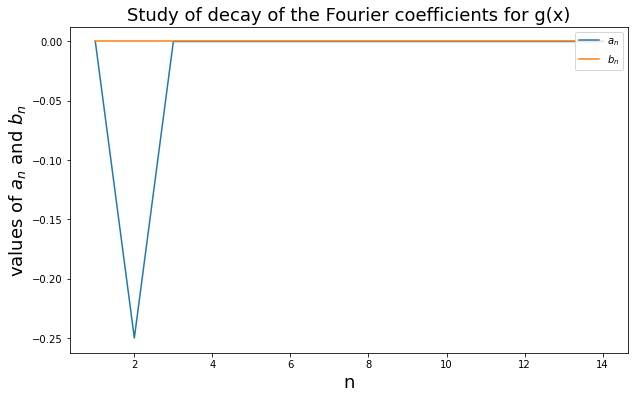

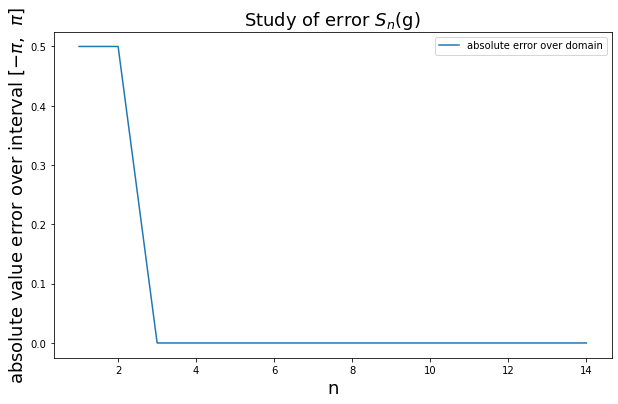

[1.1829162972558988e-17, -0.24999999999999997, -2.1798951740074253e-17, 5.551115123125783e-17, 5.002882094854069e-17, -6.591949208711868e-17, -1.6028970700966967e-16, 1.734723475976807e-18, 2.7231505454112607e-17, 4.417437057588218e-17, 5.757516375740844e-17, 7.040290310531222e-17, -1.7793411975439007e-16, -9.497489673814668e-17]
[0.5, 0.5, 1.1102230246251565e-16, 1.1102230246251565e-16, 2.220446049250313e-16, 2.7755575615628914e-16, 3.3306690738754696e-16, 5.551115123125783e-16, 5.551115123125783e-16, 5.551115123125783e-16, 6.661338147750939e-16, 7.771561172376096e-16, 7.771561172376096e-16, 1.1102230246251565e-15]


In [21]:
n = 15
N = np.arange(1, n)
X = np.linspace(-np.pi, np.pi, 100)
a_n = list()
b_n = list()
error_n = list()

def g(x):
    return np.sin(x) ** 2

for i in N:
    a_n.append(an_f(g, i))
    b_n.append(bn_f(g, i))
    error_n.append( max(np.abs(g(X)-truncated_fourier_series(g, X, i))) )
    # error_n.append(integrate.quad(lambda x: g(x) - truncated_fourier_series(g, x, i), -np.pi, np.pi)[0]) 
    

plt.figure(figsize=(10, 6))
plt.plot(N, a_n, label='$a_n$')
plt.plot(N, b_n, label='$b_n$')
plt.xlabel('n', fontsize = 18)
plt.ylabel('values of $a_n$ and $b_n$', fontsize = 18)
plt.legend(loc='upper right')
plt.title('Study of decay of the Fourier coefficients for g(x)', fontsize = 18)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N, error_n, label='absolute error over domain')
plt.xlabel('n', fontsize = 18)
plt.ylabel('absolute value error over interval [$-\pi$,  $\pi$]', fontsize = 18)
plt.legend(loc='upper right')
plt.title('Study of error $S_n$(g)', fontsize = 18)
plt.show()

print(a_n)
print(error_n)

For regular functions that are 2$\pi$-periodic, we see a direct link between the decay of the coefficients and the error.Indeed see that the are both converging directly to 0 at the same n. This can be explained by the definition of truncated Fourier series: if the coefficient decays to 0, this means the current term of the sum decays to 0, which means the error between the truncated Fourier series and the origional function tends to 0. For function that are not 2$\pi$-periodic we
observe that their coefficients converge slower and that the error takes more time to get to 0.
We observe that for very smooth functions, we have a very fast decay of the coefficients and therefore of the error.

This can be explained by the definition of truncated Fourier series: if the coefficient decays to 0, this means the current term of the sum decays to 0, which means the error between the truncated Fourier series and the origional function tends to 0.

# Section 2: Trigonometric interpolation
## 2.2 Suggestions of directions to explore

$A\hat{f}=f(X)$ where 
$A = \begin{pmatrix}
1 & 2\cos(1\times x_0) & ... & 2\cos((N-1)x_0)\\
1 & 2\cos(1\times x_1) & ... & 2\cos((N-1)x_1)\\
1 & \vdots & \vdots & \vdots \\
1 & 2\cos(1\times x_{N-1}) & ... & 2\cos((N-1)x_{N-1})\\
\end{pmatrix}$

$\hat{f} = 
\begin{align}
\begin{pmatrix}
           \hat{f_0} \\
           \hat{f_1} \\
           \vdots \\
           \hat{f_{N-1}}
\end{pmatrix}
\end{align}$


$\hat{f(X)} = 
\begin{align}
\begin{pmatrix}
           f(X_0) \\
           f(X_1) \\
           \vdots \\
           f(X_{N-1})
\end{pmatrix}
\end{align}$

0:00:00.086436


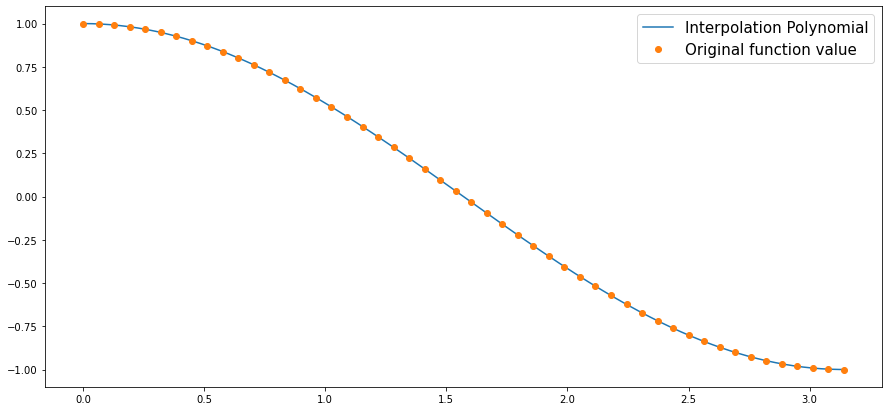

In [69]:
N = 200

def X_k(N):
    """
    Generate sequence X
    k is an array from 0,...,N−1 (assuming equidistant???)
    N is the ending-point
    output: range [π/2N, π-π/2N]
    """
    k = np.arange(0, N)
    return (2*k + 1) * np.pi / (2 * N)

def genA(X):
    """
    Generate coefficient matrix A
    Input: X is an array containing x0, x1, ..., x_(N-1)
    """
    final_matrix = []
    for x_i in X:
        subresult = [1]
        for n in range(1, len(X)):
            subresult.append( 2*np.cos(n*x_i) )
        final_matrix.append(subresult)
    return final_matrix


def f1(X):
    return X**2

def f2(X):
    return np.cos(X)

def f3(X):
    return np.abs(X)

def evalPN(f_hat,X):
    """
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis 
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P_N(x) for each x in X
    """
    result = f_hat[0]
    for i in range(1, len(f_hat)):
        result += 2 * f_hat[i] * np.cos(i*X)
    return result

start = dt.datetime.now()

f_hat = l_solve(genA(X_k(N)), f2(X_k(N)))
tab_n = np.linspace(0, np.pi, 50)   # 50 points (original function)
tab_X = np.linspace(0, np.pi, 501) # 501 points (interpolation polynomial)
PX = evalPN(f_hat, tab_X)

print(dt.datetime.now() - start)

# plot
plt.figure(figsize = (15,7))
plt.plot(tab_X, PX, label="Interpolation Polynomial")
plt.plot(tab_n, f2(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)
plt.show()

## Inverse of A
$B = \frac{1}{N} \begin{pmatrix}
\cos(0X_0) & ... & \cos(0X_{N-1}) \\
\vdots & cos(iX_j) & \vdots \\
\cos((N-1) X_0) & ... & \cos((N-1) X_{N-1}) \\
\end{pmatrix}$


In [39]:

def genB(X):
    """
    Generate coefficient matrix B
    Input: X is an array containing x0, x1, ..., x_(N-1)
    """
    N = len(X)
    final_matrix = []
    for n in range(0, len(X)):
        subresult = []
        for x_i in X:
            subresult.append( np.cos(n * x_i) / N )
        final_matrix.append(subresult)
    return final_matrix

# Test
A = genA(np.arange(1,7))
B = genB(np.arange(1,7))
print(np.matmul(B, A))

# due to rounding

[[ 1.         -0.09188273 -0.08344592 -0.06548991 -0.02689604  0.07947969]
 [-0.04594136  0.95827704 -0.07868632 -0.05517098  0.00699489  0.47235327]
 [-0.04172296 -0.07868632  0.98655198 -0.00620152  0.44407832 -0.35330715]
 [-0.03274495 -0.05517098 -0.00620152  1.48580129 -0.36650356 -0.23369622]
 [-0.01344802  0.00699489  0.44407832 -0.36650356  0.80802674 -0.20842535]
 [ 0.03973984  0.47235327 -0.35330715 -0.23369622 -0.20842535  0.84481283]]


- We observe the result of multiplication of A and B has the diagnoal line close to 1 and everything else close to 0, this is because of rounding error.
- Due to rounding error, our matrix B has some deviations from the real value (for example $\frac{ \cos(n * x_i) } {N}$ is a float point number that's not exact.
- And during the matrix multiplication, there's floating-number multiplication and floating-number sum, which gives an extra source of rounding error.

## Study difference between  $\hat{f}$ and $a_n(f)$

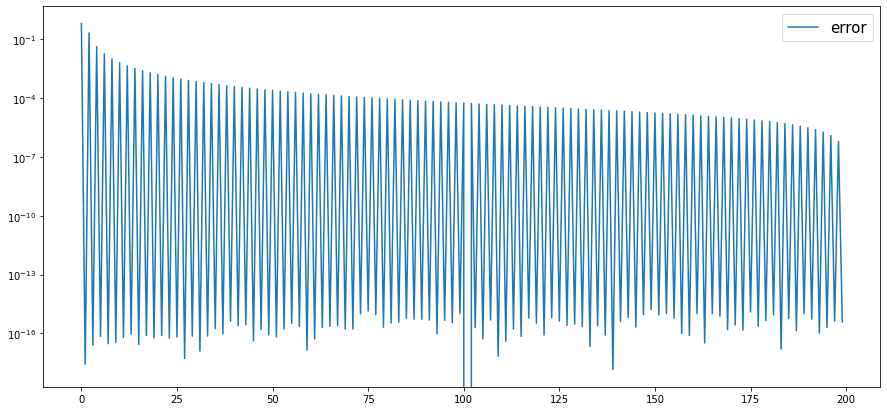

In [57]:
def f(x):
    return np.sin(x)

a_n = [an_f(f, n) for n in range(N)]
X = X_k(N)
B = genB(X)
f_hat = np.matmul(B, f(X))
err = abs(a_n - f_hat)

# plot
tab_n = np.arange(N)
plt.figure(figsize = (15,7))
plt.plot(tab_n, err, label="error")
plt.legend(fontsize = 15)
plt.yscale('log')
plt.show()

- We observed that $a_n$ converges to $\hat{f}$, so we conclude that $\hat{f_i}= a_i(f), \forall i \in [0, N-1]$ using that $\hat{f} = Bf(X)$

##  Another way to compute $\hat{f}$ by using scipy.fftpack($f$)

0:00:00.002382


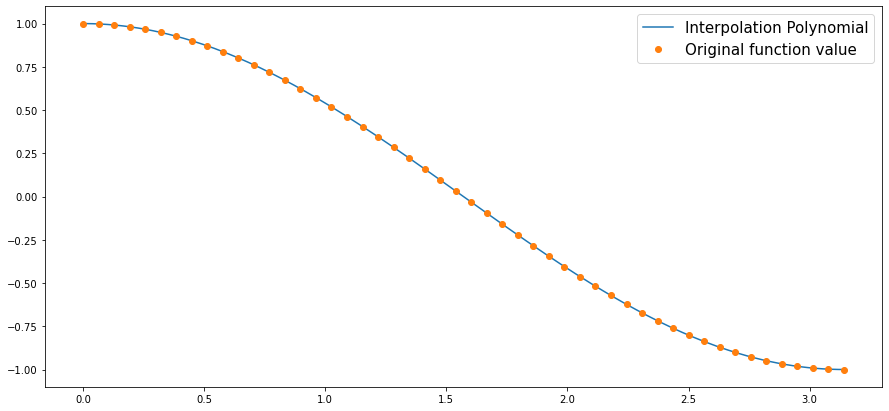

In [68]:
import scipy.fftpack as fftpack

X = X_k(N)
f = [f2(x) for x in X] # N points

start = dt.datetime.now()

f_hat = fftpack.dct(f)
tab_n = np.linspace(0, np.pi, 50)   # 50 points (original function)
PX = evalPN(f_hat, X)/(2*N) # actually differ by a factor 1/2N

print(dt.datetime.now() - start)

# plot
plt.figure(figsize = (15,7))
plt.plot(X, PX, label="Interpolation Polynomial")
plt.plot(tab_n, f2(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)
plt.show()

## timeit

- We observed the first algorithm takes 0:00:00.086436 and the second algorithm takes 0:00:00.002382, so scipy.fftpack is faster by 189.272%. 